In [1]:
#Model Evaluation & Comparison

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Load your dataset
df = pd.read_csv("..\\datasets\\student-por.csv")

# Select relevant numeric features
X = df[['studytime', 'failures', 'traveltime', 'freetime', 'Walc','absences','Medu','Fedu','health','Dalc']]
y = df['G3']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Train simple model

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R²:", r2)

MAE: 2.1032908684436804
RMSE: 2.81779369788204
R²: 0.18578829171245081


In [16]:
#random forest regressor - Nonlinear

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Create and train model
rf = RandomForestRegressor(n_estimators=300, max_depth=5, min_samples_leaf=3, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Random Forest Results:")
print("MAE:", mae)
print("RMSE:", rmse)
print("R²:", r2)


Random Forest Results:
MAE: 2.135229436630299
RMSE: 2.884102072993714
R²: 0.14701732621873143


In [22]:
#Feature Importance Visualization of Random Forest regression

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances
importances = rf.feature_importances_
features = X_train.columns

feature_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

feature_df


,Feature,Importance
1,failures,0.422502
9,Dalc,0.087718
5,absences,0.081749
7,Fedu,0.070969
0,studytime,0.067027
6,Medu,0.066038
3,freetime,0.063207
4,Walc,0.055395
8,health,0.050050
2,traveltime,0.035344


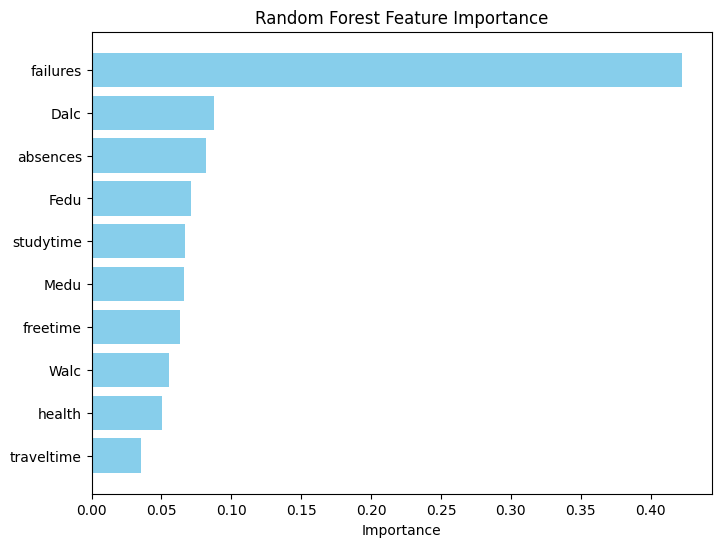

In [24]:
plt.figure(figsize=(8,6))
plt.barh(feature_df['Feature'], feature_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()  # highest importance on top
plt.show()


In [25]:
#Linear Regression vs Random Forest Regression

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Linear Regression coefficients
lr_coef = pd.Series(model.coef_, index=X_train.columns)

# Random Forest feature importances
rf_importance = pd.Series(rf.feature_importances_, index=X_train.columns)

# Combine into one DataFrame
comparison = pd.DataFrame({
    'LinearRegression': lr_coef.abs(),  # take absolute for comparison
    'RandomForest': rf_importance
}).sort_values(by='LinearRegression', ascending=False)

comparison


,LinearRegression,RandomForest
failures,1.717342,0.422502
studytime,0.585985,0.067027
Dalc,0.476855,0.087718
Medu,0.304468,0.066038
Fedu,0.245218,0.070969
traveltime,0.231201,0.035344
health,0.165865,0.050050
freetime,0.118037,0.063207
Walc,0.023458,0.055395
absences,0.013365,0.081749


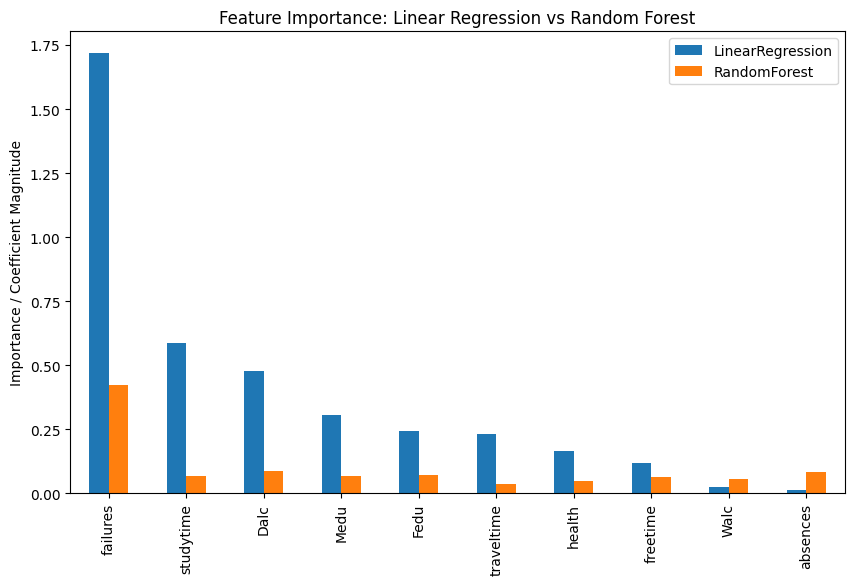

In [27]:
comparison.plot(kind='bar', figsize=(10,6))
plt.ylabel('Importance / Coefficient Magnitude')
plt.title('Feature Importance: Linear Regression vs Random Forest')
plt.show()
